In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
#RocCurveDisplay instead of plot_roc_curve

In [5]:
data = pd.read_csv("/content/dataset_Heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'fbs'}>]], dtype=object)

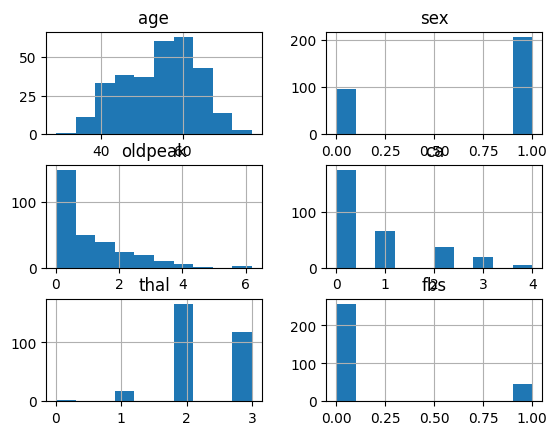

In [7]:
data[["age","sex","oldpeak","ca","thal","fbs"]].hist()

In [8]:
data = data.sample(frac=1)
X = data.drop("target",axis=1)
y = data["target"]

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2


In [11]:
y_train

,target
91,1
78,1
239,0
74,1
291,0
...,...
212,0
232,0
209,0
241,0


In [12]:
def eve(y_true,y_pred):
    conf_mat = confusion_matrix(y_true,y_pred)
    sns.heatmap(conf_mat)
    print("Accuracy  : ",accuracy_score(y_true,y_pred),"%")
    print("Precision : ",precision_score(y_true,y_pred),"%")
    print("Recall    : ",recall_score(y_true,y_pred),"%")
    print("F1 Score  : ",f1_score(y_true,y_pred),"%")

In [13]:
#first trying LogisticRegression
np.random.seed(42)
model1 = LogisticRegression(max_iter=100000)
model1.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Accuracy  :  0.9180327868852459 %
Precision :  0.9166666666666666 %
Recall    :  0.9428571428571428 %
F1 Score  :  0.9295774647887323 %


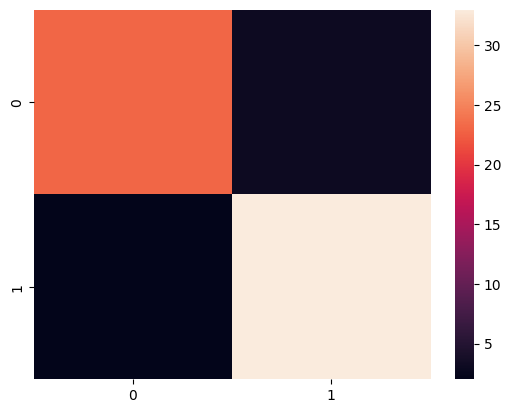

In [14]:
y_pred = model1.predict(X_test)
eve(y_test,y_pred)

In [15]:
#TRYING KNEIGHBORS CLASSIFIER
np.random.seed(42)
model2 = KNeighborsClassifier(n_jobs=-1)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

Accuracy  :  0.6721311475409836 %
Precision :  0.7586206896551724 %
Recall    :  0.6285714285714286 %
F1 Score  :  0.6875 %


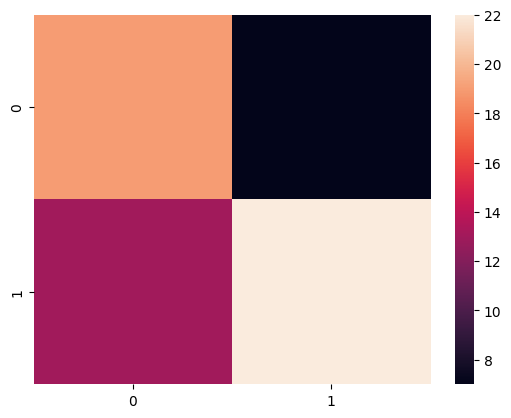

In [16]:
y_k_pred = model2.predict(X_test)
eve(y_test,y_k_pred)

In [17]:
#TRYING RANDOMFORESTCLASSIFIER
model3 = RandomForestClassifier(n_jobs=-1)
model3.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

Accuracy  :  0.9016393442622951 %
Precision :  0.9142857142857143 %
Recall    :  0.9142857142857143 %
F1 Score  :  0.9142857142857143 %


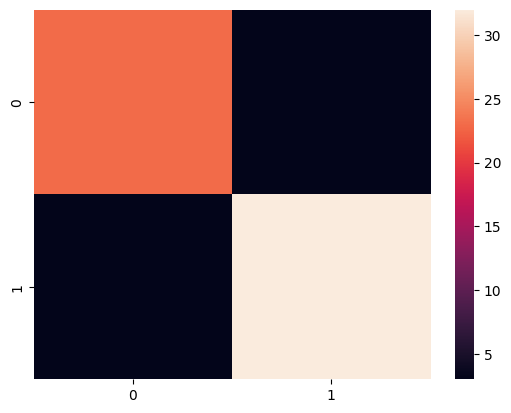

In [18]:
y_r_pred = model3.predict(X_test)
eve(y_test,y_r_pred)

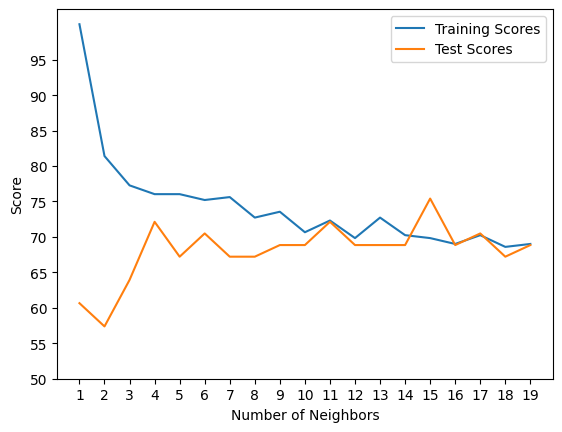

In [19]:
#GOOD BYE KNC XD
#HYPER PARAMETER TUNING
#HYPER PARAMETER TUNING FOR KNN
neighbors = range(1,20)
train_scores=[]
test_scores=[]
knn = KNeighborsClassifier()
for x in neighbors:
    knn.set_params(n_neighbors=x)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train)*100)
    test_scores.append(knn.score(X_test,y_test)*100)
plt.plot(neighbors,train_scores,label="Training Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,20,1))
plt.yticks(np.arange(50,100,5))
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.legend()

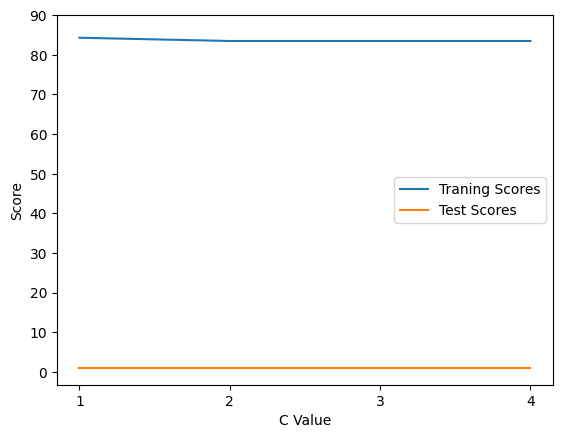

In [20]:
#HYPER PARAMETER TUNING WITH RANDOMIZEDSEARCHCV On LogisticRegression
train_score = []
test_score = []

rfc = LogisticRegression(max_iter=10000)
C_var = range(1,5)
for x in C_var:
    rfc.set_params(C=x)
    rfc.fit(X_train,y_train)
    train_score.append(rfc.score(X_train,y_train)*100)
    test_score.append(rfc.score(X_test,y_test))

plt.plot(C_var,train_score,label="Traning Scores")
plt.plot(C_var,test_score,label="Test Scores")
plt.xticks(np.arange(1,5))
plt.yticks(np.arange(0,100,10))
plt.xlabel("C Value")
plt.ylabel("Score")
plt.legend()

In [21]:
rfc.score(X_test,y_test) * 100

91.80327868852459

In [45]:
#Evaluating our tuned machine learning classifier

def eve(y_true,y_pred,rfc):
    print("Accuracy  : ",accuracy_score(y_true,y_pred),"%")
    print("Precision : ",precision_score(y_true,y_pred),"%")
    print("Recall    : ",recall_score(y_true,y_pred),"%")
    print("F1 Score  : ",f1_score(y_true,y_pred),"%")
    conf_mat = confusion_matrix(y_true,y_pred)
    sns.heatmap(conf_mat)
    print("ROC_AUC_Score : ",roc_auc_score(y_true,y_pred))
    print()
    print("******************Classification Report*****************")
    print(classification_report(y_true,y_pred))
    plot_roc_curve(rfc,X_test,y_test)


Accuracy  :  0.9180327868852459 %
Precision :  0.9166666666666666 %
Recall    :  0.9428571428571428 %
F1 Score  :  0.9295774647887323 %
ROC_AUC_Score :  0.9137362637362637

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.92      0.94      0.93        35

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



NameError: name 'plot_roc_curve' is not defined

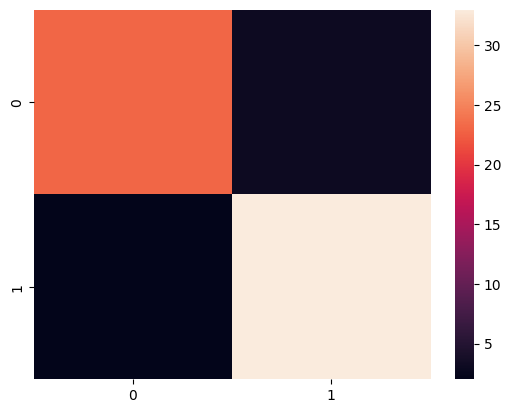

In [46]:
y_pred = rfc.predict(X_test)
eve(y_test, y_pred, rfc)

In [47]:
# THE ABOVE CLASSIFICATION REPORT IS PREPARED ONLY ON THE X_TEST DATASET, THAT IS ONLY 20% OF THE DATA. THIS IS NOT A GOOD REPRESENTATIVE OF THE ENTIRE DATASET. HENCE, WE WOULD PERFORM A CROSS VALIDATION ON THE DATASET, AND THEN FORM A CLASSIFICATION REPORT THAT IS THE AVERAGE OF ALL THE CROSS VALIDATIONS

In [48]:
# HYPERTUNING WITH GridSearchCV

In [49]:
g_grid = {"C" : np.logspace(-4,4,30),
         "solver" : ["liblinear"]}
gs_model1 = GridSearchCV(model1,
                        param_grid=g_grid,
                        verbose=2,
                        cv=5)
gs_model1.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [50]:
gs_model1.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [51]:
gs_model1.score(X_test,y_test)
gs_model1_y_pred = gs_model1.predict(X_test)

Accuracy  :  0.9180327868852459 %
Precision :  0.9166666666666666 %
Recall    :  0.9428571428571428 %
F1 Score  :  0.9295774647887323 %
ROC_AUC_Score :  0.9137362637362637

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.92      0.94      0.93        35

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



NameError: name 'plot_roc_curve' is not defined

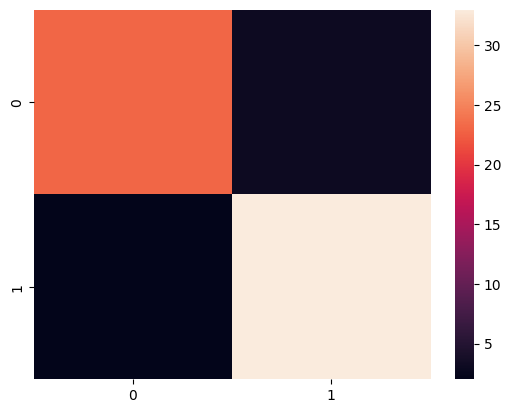

In [52]:
eve(y_test,gs_model1_y_pred,gs_model1)

In [53]:
gs_model1.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [54]:
tuned_model = LogisticRegression(C=0.20433597178569418,
                                solver='liblinear')
tuned_model.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [55]:
def metrics(tuned_model):
    tuned_model_ac_sc = cross_val_score(tuned_model,X,y,cv=5,scoring="accuracy").mean()
    tuned_model_prec_sc = cross_val_score(tuned_model,X,y,cv=5,scoring="precision").mean()
    tuned_model_rec_sc = cross_val_score(tuned_model,X,y,cv=5,scoring="recall").mean()
    tuned_model_f1_sc = cross_val_score(tuned_model,X,y,cv=5,scoring="f1").mean()
    print("Accuracy Score :",tuned_model_ac_sc," \nPrecision Score :",tuned_model_prec_sc," \nRecall Score :",tuned_model_rec_sc,"\nF1 Score :",tuned_model_f1_sc)

In [56]:
metrics(model1)

Accuracy Score : 0.8318579234972677  
Precision Score : 0.8225712930976089  
Recall Score : 0.8848484848484848 
F1 Score : 0.8509262108599309


In [57]:
metrics(tuned_model)

Accuracy Score : 0.835191256830601  
Precision Score : 0.8180051970767943  
Recall Score : 0.9030303030303031 
F1 Score : 0.8564475294622353


In [58]:
# AS CAN BE SEEN ABOVE, MODEL1 IS THE BASELINE MODEL, WHILE TUNED_MODEL IS REFINED LOGISTICS_REGRESSION MODEL.
# THE TUNED MODEL HAS A SLIGHTLY HIGHER ACCURACY THAN THE BASELINE PREDICTIONS

In [60]:
# modelname.coef_ gives the importance percentage of each feature in the dataset
tuned_model.coef_

array([[ 0.00737172, -0.79187631,  0.6710237 , -0.01562012, -0.00294651,
        -0.03334878,  0.24687588,  0.02865353, -0.48968347, -0.50644605,
         0.32433741, -0.62141905, -0.61736302]])

In [61]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1


In [62]:
coef_list = tuned_model.coef_
feature_dict = dict(zip(data.columns,list(tuned_model.coef_[0])))
feature_dict

{'age': 0.007371716430902592,
 'sex': -0.7918763124691759,
 'cp': 0.6710236993140412,
 'trestbps': -0.015620118852560731,
 'chol': -0.002946512954976681,
 'fbs': -0.033348779986855696,
 'restecg': 0.2468758758791003,
 'thalach': 0.028653526792752133,
 'exang': -0.4896834683755843,
 'oldpeak': -0.5064460512312151,
 'slope': 0.3243374058857371,
 'ca': -0.6214190487740433,
 'thal': -0.6173630179128812}

<Axes: title={'center': 'Feature Importance '}>

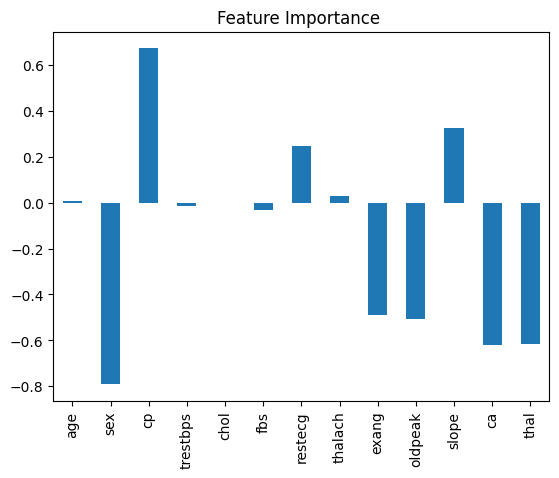

In [63]:
feature = pd.DataFrame(feature_dict,index=[0])
feature.T.plot.bar(title="Feature Importance ",legend=False)

In [64]:
# THANK YOU